INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degr

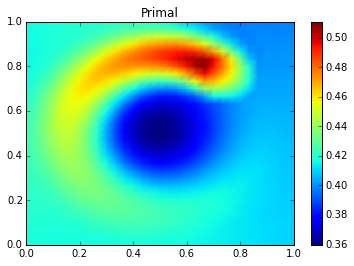

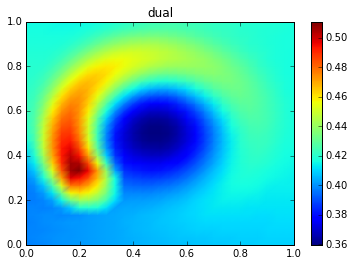

INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element domain to <Domain built from <triangle cell in 2D> with label dolfin_mesh_with_id_0>.
INFO:UFL:Adjusting missing element degree to 1


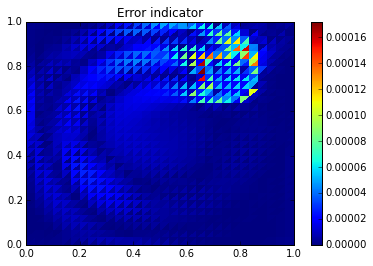

In [1]:
get_ipython().magic('matplotlib inline')
get_ipython().magic('run /home/fenics/fenics-matplotlib.py')
from dolfin import *; from mshr import *; from IPython.display import display, clear_output; import time
import logging; logging.getLogger('FFC').setLevel(logging.WARNING)

mesh = UnitSquareMesh(30,30)

# FEM functions
Q = FunctionSpace(mesh, "CG", 1);

wprimal = Function(Q);
wdual = Function(Q);
u=TrialFunction(Q);
v= TestFunction(Q);

alpha = 0.1
epsilon = 0.01

f= Expression("((x[0] - 0.75)*(x[0] - 0.75) + (x[1] - 0.75)*(x[1] - 0.75)) < 0.1*0.1 ? 1 : 0")
psi= Expression("((x[0] - 0.25)*(x[0] - 0.25) + (x[1] - 0.25)*(x[1] - 0.25)) < 0.1*0.1 ? 1 : 0")
beta = Expression(("-5*(x[1] - 0.5)", "5*(x[0] - 0.5)"))

pl, ax = plt.subplots(); 

def aform(u,beta,v):
    return epsilon*inner(grad(u), grad(v)) + inner(beta, grad(u))*v + alpha*u*v

def Lform(f,v):
    return f*v

# Primal problem
a= aform(u,beta, v)*dx
L= Lform(f,v)*dx

solve(a==L, wprimal)

mplot_function(wprimal)
plt.title("Primal")
plt.colorbar();

# Dual problem
a= aform(u,-beta,v)*dx
L= Lform(psi,v)*dx

solve(a==L, wdual)

fig = plt.figure(2);
mplot_function(wdual)
plt.title("dual")
plt.colorbar();
plt.show();

# Compute error indicator
Z = FunctionSpace(mesh, "DG", 0);
z = TestFunction(Z)
ei = Function(Z)

re=aform(wprimal,beta,wdual)*z*dx-Lform(f,wdual)*z*dx

ei.vector()[:] = assemble(re).array()
ei.vector().abs()

mplot_function(ei)
plt.title("Error indicator")
plt.colorbar();
plt.show();